In [17]:
import cv2
import matplotlib.pyplot as plt
from imutils import face_utils

In [18]:
cascPath = "data/haarcascade_frontalface_default.xml"
eyePath = "data/haarcascade_eye.xml"
smilePath = "data/haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

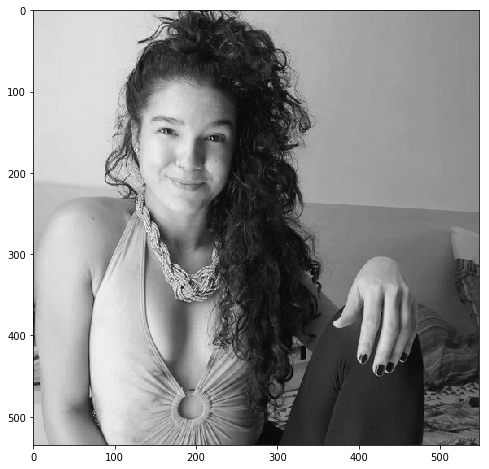

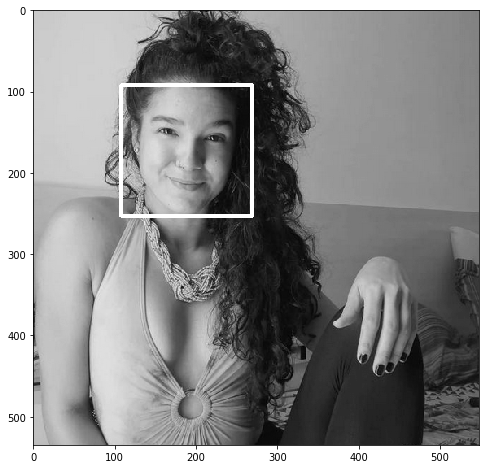

In [14]:
# Load the image
gray = cv2.imread('data/nata.png', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
# plt.show()

# Detect faces
faces = faceCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [20]:

font = cv2.FONT_HERSHEY_SIMPLEX
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)

    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()